#### Predict Race of Arrestee by Police IVs and Offense Type (Moderators)

#### All analyses below are for men arrested in 2014, at the individual level, clustered by county

In [1]:
import pandas
import numpy

import statsmodels.iolib.summary2
from statsmodels.iolib.summary2 import summary_params
from statsmodels.iolib.summary2 import summary_col

import statsmodels.formula.api as smf
from patsy import Treatment

import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dataset = pandas.read_csv('data.csv')

In [8]:
%matplotlib inline

In [39]:
results = []
control_groups = [controls, controls + pd_controls, controls + inc_controls, controls + pd_controls + inc_controls]

for control_group in control_groups:
    controls_string = make_controls(control_group)
    results.append(smf.ols(formula = 'arrests_w_percent ~ ' + 'w_officers_percent_calc' + \
            controls_string, data = dataset).fit())

In [40]:
results[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      arrests_w_percent   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 11 May 2015   Prob (F-statistic):          4.05e-168
Time:                        14:56:32   Log-Likelihood:                -4075.7
No. Observations:                 968   AIC:                             8165.
Df Residuals:                     961   BIC:                             8199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  11.4792      8.323      1.379      0.168        -4.854    27.812
w_officers_percent_calc    -0.1163      0.045     -2.603      0.009        -0.204    -0.029
b_residents_percent        -0.2415      0.079     -3.071      0.002        -0.396    -0.087
w_residents_percent         1.0003      0.078     12.816      0.000         0.847     1.154
inc_mean                   -0.1769      0.041     -4.333      0.000        -0.257    -0.097
unemployed                 -0.1212      0.192     -0.631      0.528        -0.498     0.256
total_residents         -4.165e-06   1.69e-06     -2.458      0.014     -7.49e-06 -8.39e-07
==============================================================================
Omnibus:                      154.247   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.320
Skew:                          -0.825   Prob(JB):                     3.96e-91
Kurtosis:                       5.756   Cond. No.                     6.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

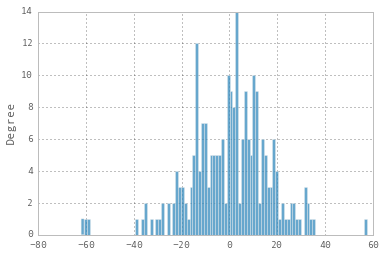

In [11]:
results[1].resid.plot(kind = 'hist', alpha = 0.75, bins = 100)

In [25]:
influence = results[3].get_influence()
(c, p) = influence.cooks_distance
# How to get at the object with high influence?  I want the county number

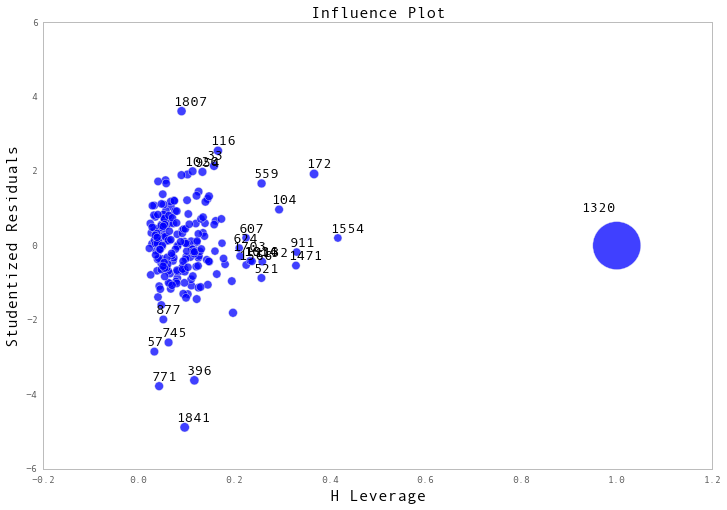

In [28]:
fig, ax = plt.subplots(figsize = (12,8))
fig = sm.graphics.influence_plot(results[3], ax = ax, criterion = "cooks")

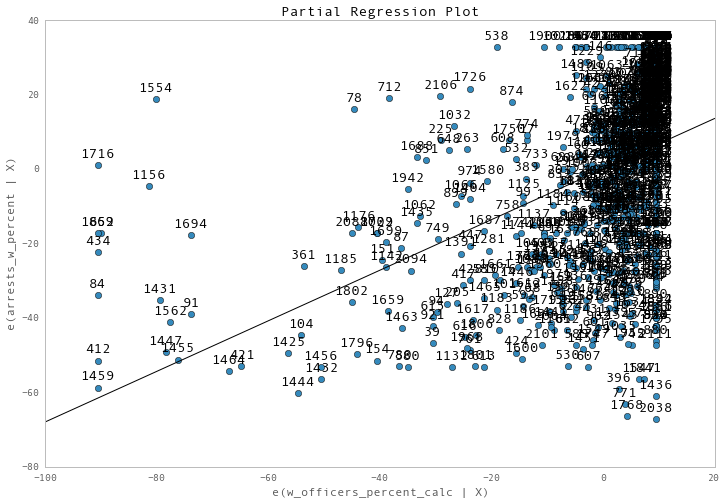

In [18]:
# To see the effect of excluding a variable on the DV-IV relationships
pr_data = dataset[controls + pd_controls + inc_controls + ['arrests_w_percent']][:]
pr_data = pr_data[pr_data['arrests_w_percent'].notnull()][:]
pr_data = pr_data[pr_data['w_officers_percent_calc'].notnull()][:]
pr_data = pr_data[pr_data['ccrb_wpowers'].notnull()][:]

fig, ax = plt.subplots(figsize = (12,8))
fig = sm.graphics.plot_partregress('arrests_w_percent', 'w_officers_percent_calc', ['ccrb_wpowers'], data = pr_data, ax = ax)